### Lab week 7 (Feb 15th – Feb 19th)
### Linear regression and cross-validation

One of the techniques often used in machine learning is cross-validation. There is a lot about that in
the text book in section 5.1. Cross-validation is a technique used to assess how well a method will
generalize. It is particularly used much when you have small data sets, and also when you want to
find out what parameters you should use in your machine learning model.
The tasks this week is to:
1. Run ordinary regression on the boston data set. What is R2
? Does it overfit?
2. Run Lasso and Ridge regression on the boston data set. You can also use the extended
boston data set provided in the mglearn package. What is R2 with various alphas for each of
Ridge and Lasso? How much are they overfitting?
3. Now read about cross-validation, and run a cross-validation approach on Lasso and Ridge
methods using the boston data set. What parameters of alpha leads to best average R2? Also
check the training set scores for each fold by getting results from scikit’s cross_validate
method. What are your preferred values for alpha for Ridge and Lasso?

### Linear Models in scikit-learn:
https://scikit-learn.org/stable/modules/linear_model.html

### Cross-validation: evaluating estimator performance
https://scikit-learn.org/stable/modules/cross_validation.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

### Testing Linear Regression Assumptions in Python

https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

In [2]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport


#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

In [3]:
#imports from sklearn library

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_validate

In [4]:
#loading the boston housing dataset direclty from sklearn
boston = datasets.load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# Convert data to a pandas dataframe
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#Generate profile report to inspect data
bos.profile_report()

### Correlation matrix

<AxesSubplot:>

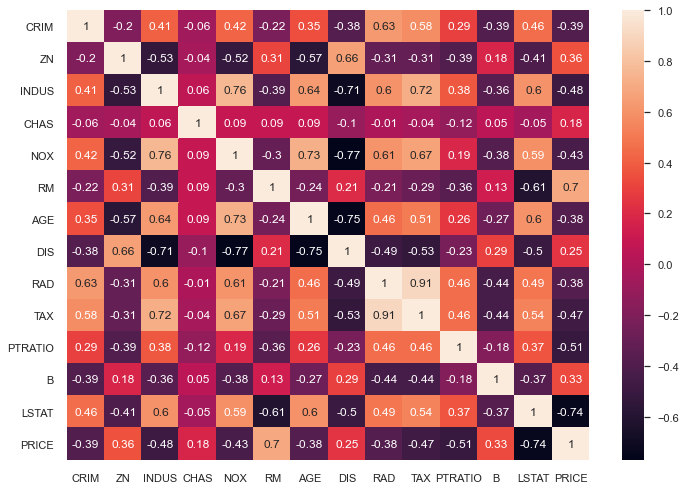

In [9]:
correlation_matrix = bos.corr().round(2)
#Larger sns figures
sns.set(rc={'figure.figsize':(11.7,8.27)})
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)


#### Observations

* From the above coorelation plot we can see that PRICE is strongly correlated to LSTAT, RM

* RAD and TAX are stronly correlated, so we don't include this in our features together to avoid multi-colinearity

### Linear relationships

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


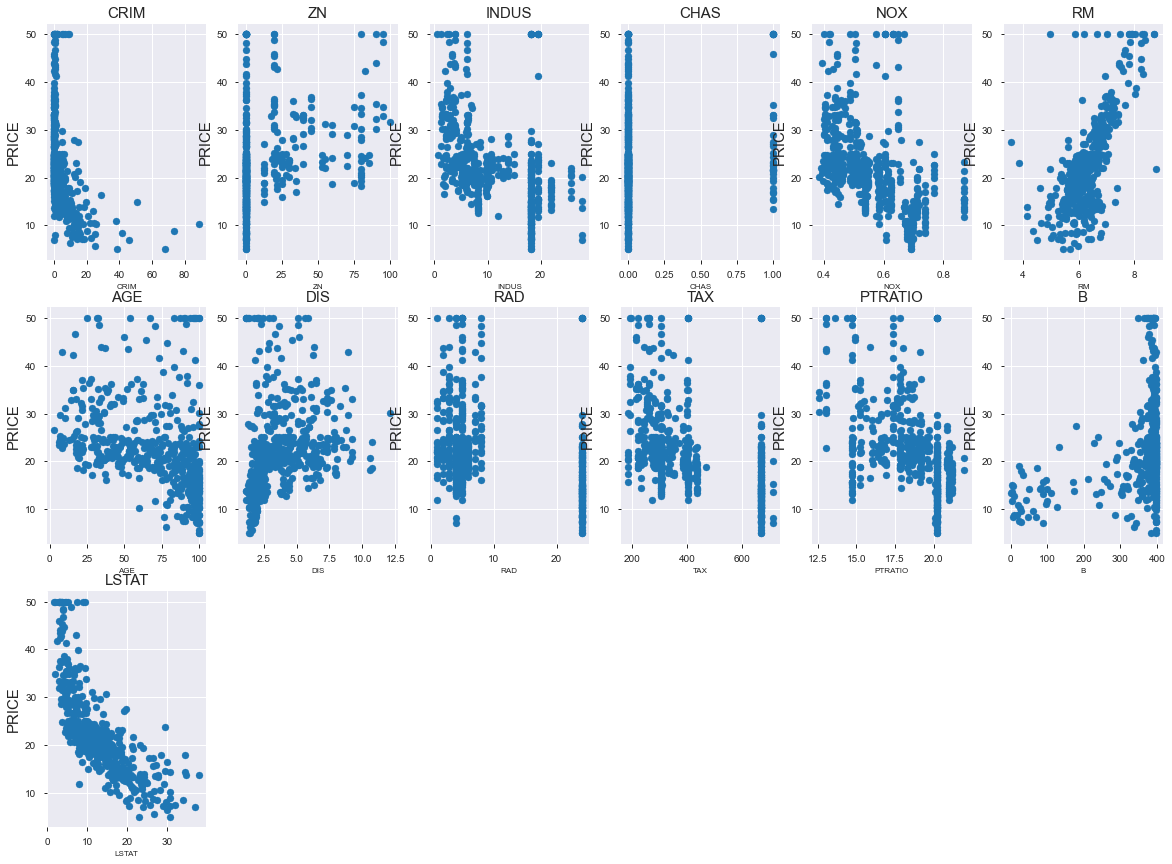

In [7]:
# Create multiple plots
features = bos.drop('PRICE', 1).columns
target = bos['PRICE']
plt.figure(figsize=(20,20))
for index, feature_name in enumerate(features):
    # 4 rows of plots, 13/3 == 4 plots per row, index+1 where the plot begins
    plt.subplot(4,len(features)/2, index+1)
    plt.scatter(bos[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8) #Removed for easier view of plots
    plt.ylabel('PRICE', fontsize=15)

#### Linear Relationships
LSTAT and RM look like the only ones that have some sort of linear relationship. I would want to use these two features. As part of the assumptions of a linear regression, it is important because this model is trying to understand the linear relatinship between the feature and dependent variable. The model may underfit as a result of not checking this assumption. It underfits because if we draw a line through the data points in a non-linear relationship, the line would not be able to capture as much of the data.

#### Transform the non-linear relationship logging the values.

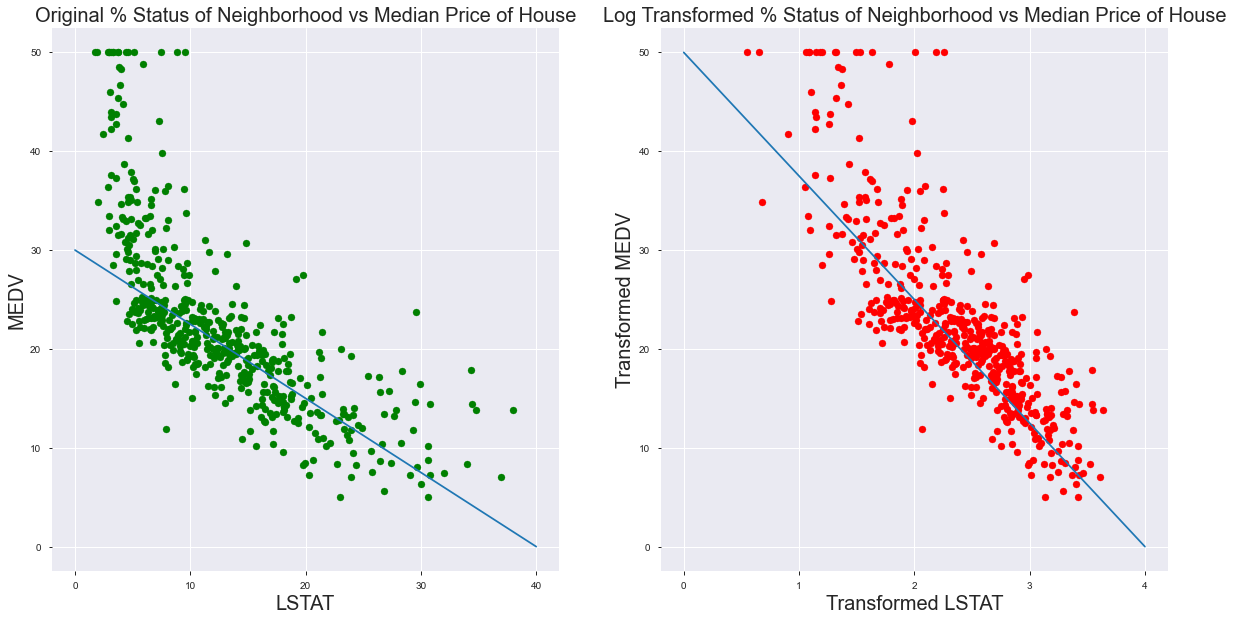

In [8]:
bos["LOGLSTAT"] = bos["LSTAT"].apply(np.log)
plt.figure(figsize=(20,10))

# showing plot 1
plt.subplot(1,2,1)
plt.scatter(bos["LSTAT"], bos['PRICE'], color='green')
plt.title('Original % Status of Neighborhood vs Median Price of House', fontsize= 20)
plt.xlabel('LSTAT',fontsize=20);
plt.ylabel('MEDV',fontsize=20);
plt.plot([0,40],[30,0])

# showing plot 2
plt.subplot(1,2,2)
plt.scatter(bos["LOGLSTAT"], bos['PRICE'], color='red')
plt.title('Log Transformed % Status of Neighborhood vs Median Price of House', fontsize= 20)
plt.xlabel('Transformed LSTAT',fontsize=20);
plt.ylabel('Transformed MEDV',fontsize=20);
plt.plot([0,4],[50,0])


#Apply global parameters
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.show()

#### Prepare data for training 

In [97]:
X = pd.DataFrame(np.c_[bos['LOGLSTAT'], bos['RM']], columns = ['LOGLSTAT','RM'])
Y = bos['PRICE']

#### Split the data into training and testing sets



In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## 1. Run ordinary regression on the boston data set. What is R2 ? Does it overfit?

In [99]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [104]:
print("Training set score: {:.2f}".format(lin_model.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(lin_model.score(X_test, Y_test)))

Training set score: 0.72
Test set score: 0.61


With an r-squared value of .72 on the training set , the model is not terrible but it’s not perfect. This could be improved by:

* bigger dataset
* better features or maybe more features
* remove outliers
* perform optimization techniques like Lasso and Ridge

#### Model evaluation for testing set

In [105]:
Y_pred = lin_model.predict(X_test)

# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, Y_pred)))

# r-squared score of the model
r2 = r2_score(Y_test, Y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 5.124429091593058
R2 score is 0.6106380271705051


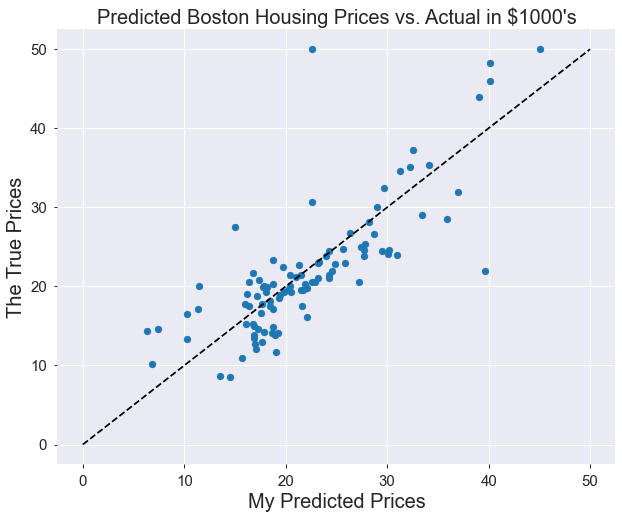

In [106]:
# Plot my predictions vs actual

plt.figure(figsize=(10,8))
plt.scatter(Y_pred, Y_test)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('The True Prices', fontsize=20);


plt.xlabel('My Predicted Prices', fontsize=20);
plt.title("Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

## 2. Run Lasso and Ridge regression on the boston data set. You can also use the extended boston data set provided in the mglearn package. What is R2 with various alphas for each of Ridge and Lasso? How much are they overfitting?

In [91]:
from sklearn.linear_model import Ridge

In [92]:
rdg = Ridge(alpha=10)
rdg.fit(X_train, Y_train)

Ridge(alpha=10)

In [93]:
Y_pred = rdg.predict(X_test)

# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, Y_pred)))

# r-squared score of the model
r2 = r2_score(Y_test, Y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 4.554563586740961
R2 score is 0.6750017353018671


### LASSO

In [94]:
from sklearn.linear_model import Lasso

In [95]:
lso = Lasso(alpha=0.004498)
lso.fit(X_train, Y_train)

Lasso(alpha=0.004498)

In [96]:
Y_pred = lso.predict(X_test)

# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, Y_pred)))

# r-squared score of the model
r2 = r2_score(Y_test, Y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 4.577606681150731
R2 score is 0.6717048616618587


## 3. Run a cross-validation approach on Lasso and Ridge methods using the boston data set. 
What parameters of alpha leads to best average R2 ? Also check the training set scores for each fold by getting results from scikit’s cross_validate method. What are your preferred values for alpha for Ridge and Lasso?

The cross_val_score calculates the R squared metric for the applied model. R squared error close to 1 implies a better fit and less error.

##### How to Develop LASSO Regression Models in Python: 
https://machinelearningmastery.com/lasso-regression-with-python/

### Using built in cross-validation method for Ridge and Lasso to find best alpha

In [1]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=3).fit(X, Y)
ridge.score(X, Y)
print('The best value for Ridge alpha is: %f' % ridge.alpha_)

NameError: name 'X' is not defined

In [112]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=3).fit(X, Y)
lasso.score(X, Y)
print('The best value for Lasso alpha is: %f' % lasso.alpha_)

The best value for Lasso alpha is: 0.004498


### Resources 
https://github.com/animesh-agarwal/Machine-Learning-Datasets/blob/master/boston-housing/Linear_Regression.ipynb

https://medium.com/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a